<img src="logo.png">
# GalsenAI 🇸🇳 First meetup 
# Host : @Edacy

Disclaimer: This is not a course, but a discussion and knowledge sharing between passionnated people of AI.

## Let's describe the tool (Jupyter Notebook) we use to describe Linear Regression.
### Data Science Terminology 
| **Machine**                           | **Human**                                                |
| ------------------------------------- | ----------------------------------------------------     |
|**What does `learning` mean?**          | **How do we learn as humans?**                         |
|**Supervised or unsupervised learning?** | **Do you really need a teacher?**      |
|**What does `prediction` mean?**        | **How do we make decisions as humans?**               |  
|**What is a `model` in data science?**  | **What is expertise and knowledge for humans?**        |  
|**What are `training` and `test` dataset?** | **What is  an assigment and exams for a student?**      |


### What is linear regression?
Linear regression (LR) is used to **predict** **continuous** variables.
### What is a continuous variable?
A variable that can take any value in an **interval**. A **discrete** variable can only take specific values.
## Some use cases:
- Price of a car or a house
+ Number of lines of code needed for a program
+ Price of Amazon spot instance
- Number of time a user will spend on a web page
- Quantity of electricity a city will consume
- Use your imagination

In [1]:
from IPython.display import display_html, Markdown
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()+'&emsp;&emsp;&emsp;&emsp;&emsp;'
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

## Read our two datasets

In [2]:
import pandas as pd
import numpy as np
# distanceXconsume
temp_vs_speed = pd.read_csv('car_fuel_consume/data.csv',usecols=[3,2],thousands=',').dropna()
car_price_over_time = pd.read_csv('car_price_prediction/data.csv',usecols=[3,2]).dropna()

print("Temp VS speed num rows : %d num columns : %d" % temp_vs_speed.shape)
print("Present price VS Selling Price data num rows : %d num columns : %d " % car_price_over_time.shape)

Temp VS speed num rows : 376 num columns : 2
Present price VS Selling Price data num rows : 301 num columns : 2 


In [3]:
display_side_by_side(temp_vs_speed[0:6],car_price_over_time[0:6])

,speed,temp_inside
0,26,215.0
1,30,215.0
2,38,215.0
3,36,215.0
4,46,215.0
5,50,215.0
,Selling_Price,Present_Price
0,3.35,5.59
1,4.75,9.54
2,7.25,9.85


## Use Scikit-Learn linear regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Separate inputs(features) and labels

In [5]:
temp,speed = temp_vs_speed.iloc[:, 1:2].values, temp_vs_speed.iloc[:, 0].values
Pres_price,Sel_price = car_price_over_time.iloc[:, 1:2].values, car_price_over_time.iloc[:, 0].values

## Separate training and test dataset

In [6]:

Pres_priceTrain, Pres_priceTest, Sel_priceTrain, Sel_priceTest = train_test_split(Pres_price,Sel_price, test_size = 1/5)
tempTrain, tempTest, speedTrain, speedTest = train_test_split(temp,speed, test_size = 1/5)
print(" Training data for selling price vs present price num rows : %d num columns : %d" % Pres_priceTrain.shape)
print(" Test data for selling price vs present price num rows     : %d num columns  : %d" % Pres_priceTest.shape)


 Training data for selling price vs present price num rows : 240 num columns : 1
 Test data for selling price vs present price num rows     : 61 num columns  : 1


## Define and train the model

In [7]:
selPriceModel = LinearRegression()
selPriceModel.fit(Pres_priceTrain, Sel_priceTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## How much should I pay for these two old cars?

In [8]:
car_price_over_time[2:4]

,Selling_Price,Present_Price
2,7.25,9.85
3,2.85,4.15


In [9]:
selPriceModel.predict([[9.85],[4.15]])

array([5.70414178, 2.84689539])

## This is cool but how does it all work? How can I implement my own linear regression? 
## First, let's train a new model using the **speed** vs **temperature** data set

In [10]:
display_side_by_side(temp_vs_speed[0:6],car_price_over_time[0:6])

,speed,temp_inside
0,26,215.0
1,30,215.0
2,38,215.0
3,36,215.0
4,46,215.0
5,50,215.0
,Selling_Price,Present_Price
0,3.35,5.59
1,4.75,9.54
2,7.25,9.85


## Again, let's train the model and predict

In [11]:
speedModel = LinearRegression()
speedModel.fit(tempTrain, speedTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
temp_vs_speed.iloc[[0,312]]

,speed,temp_inside
0,26,215.0
324,29,22.0


In [13]:
speedModel.predict([[215],[22]])

array([42.05308772, 42.5699775 ])

## Hmm, this is weired. What's happening here?
## Ok, let's figure out how this works.
## Model : 
### $y = \theta_{1} x X_{1}+\theta_{2} x X_{2} +......+ \theta_{n}X_{n} +\theta_{0}$
## EX :
### $sellingPrice = \theta_{1} * presentPrice + \theta_{0}$  => ( y = ax + b )
## So What ?
### The goal is to have **a** and **b** that are optimized to give the selling price given the present price
## Loss function or Cost function (J)
### It's the function that we will use during training to know if our model is learning well the patterns in the data
## First, let's plot our model from Scikit-Learn

In [14]:
import matplotlib.pyplot as plt 
def scatterAnndPlot(x,y,yPred,title,xlabel,ylabel,ax,c):
    ax[c].scatter(x, y, color = 'red')
    ax[c].plot(x, yPred, color = 'blue')
    ax[c].set_title(title)
    ax[c].set_xlabel(xlabel)
    ax[c].set_ylabel(ylabel)

In [15]:
def createSubPlotsEspace(num_rows, num_columns):
    fig, ax = plt.subplots(nrows=num_rows, ncols=num_columns)
    fig.set_size_inches(w=25,h=7)
    return ax

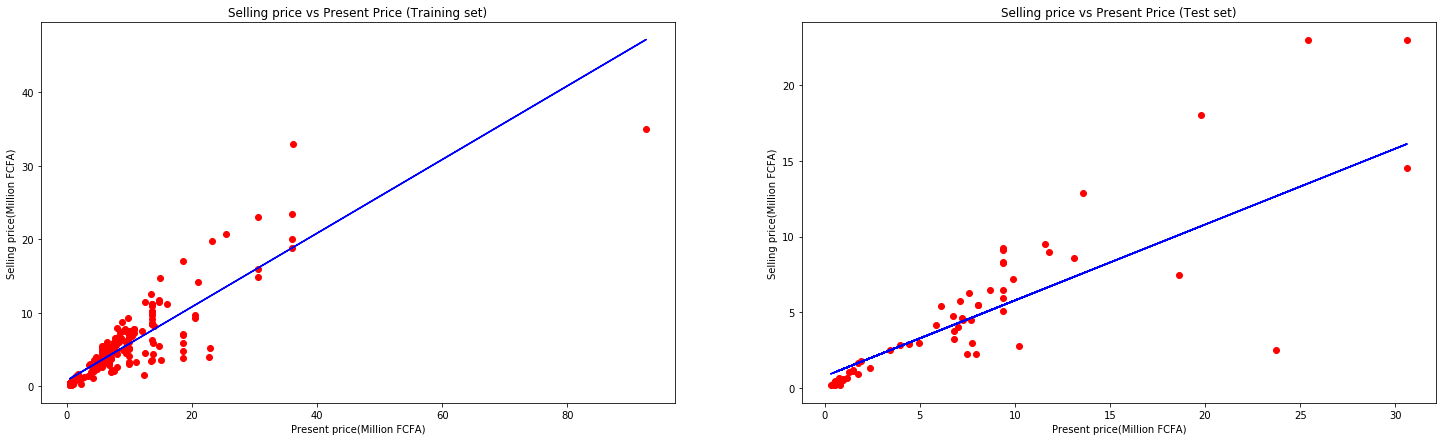

In [16]:
# batch prediction
Sel_pricePredictionTrain = selPriceModel.predict(Pres_priceTrain)
Sel_pricePredictionTest = selPriceModel.predict(Pres_priceTest)
# plot real vs predicted values
PresentVsSellingSpace = createSubPlotsEspace(1,2)
scatterAnndPlot(Pres_priceTrain,Sel_priceTrain,Sel_pricePredictionTrain,
                'Selling price vs Present Price (Training set)',
                'Present price(Million FCFA)',
                'Selling price(Million FCFA)',
                PresentVsSellingSpace,0)
scatterAnndPlot(Pres_priceTest,Sel_priceTest,Sel_pricePredictionTest,
                'Selling price vs Present Price (Test set)',
                'Present price(Million FCFA)',
                'Selling price(Million FCFA)',
                PresentVsSellingSpace,1)

## Any idea on how to define that mysterious lost function?
### **Mean Absoluter Error(L1)** and **Mean Squared Error(L2)** come to the rescue.
### L1 = $\frac{1}{N} \sum_{i=1}^N|Yi-Ypred$|  `=>`  $\frac{1}{N} \sum_{i=1}^N(Yi-(axi+b))$
- All error are treated equally.

### L2 = $\frac{1}{N} \sum_{i=1}^N(Yi-Ypred)^2$ `=>` $\frac{1}{2N} \sum_{i=1}^N(Yi-Ypred)^2$  `=>`  $\frac{1}{2N} \sum_{i=1}^N(Yi-(axi+b))^2$
- Important errors are amplified whereas small error are neglected.

## We want to minimize this function. The smaller the value of this function the better our model.
## Vectorization is key.
## Implement the L2 cost function with vectorization.
+ BLAS (Basic Linear Algebra Subprogram) => Fast and cleaner code

## Matrix multiplication and Transpose, Wise element operation
### $ \theta_{1} * x + \theta_{0} == \theta_{1} * x + \theta_{0} * 1$

In [17]:
Theta0, Theta1, x = 2,3,4
Theta = np.array([2,3]).reshape(-1,1) #Transform to vector
X = np.array([1,4]).reshape(1,-1)
print("Non vectorized : ", Theta1*x+Theta0)
print("Vectorized     : ", np.matmul(X, Theta))

Non vectorized :  14
Vectorized     :  [[14]]


## Let's add this ones for every input

In [18]:
def addOnesToDataset(X): # make this take unlimited datasets
    N=len(X)
    oneVector = np.ones((N,1))
    return np.hstack((oneVector,X))  

In [19]:
tempTrainWith1, tempTestWith1, Pres_priceTrainWith1, Pres_priceTestWith1 = addOnesToDataset(tempTrain),addOnesToDataset(tempTest), addOnesToDataset(Pres_priceTrain), addOnesToDataset(Pres_priceTest)

## L2 function

In [20]:
def L2(X,Y,prameters):
    N = len(X)
    diffVector = np.matmul(X,prameters.reshape(-1,1)) - Y.reshape(-1,1)
    diffVectorSquare=np.power( diffVector ,2)
    sumTerm = np.sum(diffVectorSquare)
    return sumTerm / (2*N);

## Let's have this done in a second

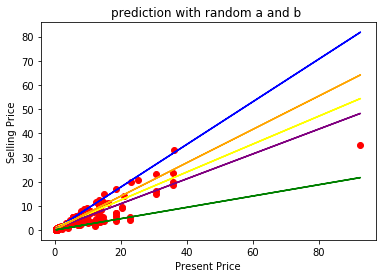

In [21]:
a= np.random.rand(5) 
b= np.random.rand(5) 
colors = ['blue','yellow','purple','orange','green']
plt.scatter(Pres_priceTrain, Sel_priceTrain, color = 'red')
for i in range(0,5):
    randomPrediction = Pres_priceTrain*a[i]+b[i]
    plt.plot(Pres_priceTrain,randomPrediction, color = colors[i])
    plt.title("prediction with random a and b ")
    plt.xlabel("Present Price")
    plt.ylabel("Selling Price")
plt.show()

## This isn't a good idea, but how do we optimize it?

## **Gradient Descent** is here to save the day
### It's an algorithm that we will use to minimize the cost function => optimize THETAs(a,b)
## Gradient Descent Algorithm:
### $ THETA_{i} = THETA_{i} - learnningRate *$ &Delta;$THETA_{i} $ 
## Learning rate: control the speed of training
## Warning: This update have to be done **simultaneously, the following is a bad implementation**
### $ \theta_{0} = \theta_{0} - learnningRate *$ &Delta;$\theta_{0} $ 
### $ \theta_{1} = \theta_{1} - learnningRate *$ &Delta;$\theta_{1} $ 



<img src="gradient_descent.png">

# Learning Rate: How quick do you want to learn?

<img src="big_vs_small_lr.png">

### Let's face Gradient Optimization. Do you remember your old old lessons about derivatives and partial derivatives?

## Scalar Rule 
### $ \frac{d}{dx}(αu) = α\frac{du}{dx}$
## Sum Rule
### $ \frac{d}{dx}\sum{u} = \sum{\frac{du}{dx}}$
## Power Rule
### $ \frac{d}{dx}u^{n} = nu^{n-1}\frac{du}{dx}$
## Chain Rule
### $ \frac{d}{dx}f\big(g(x)\big) = f^{'}\big(g(x)\big) g^{'}(x)$
## Put it all together
### $ J\big(θ\big) = \frac{1}{2N} \sum_{i=1}^N \big( M(x^{(i)}) - y^{(i)} \big)^{2} $  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[0]** 
### $ \frac{d}{dθ_{0}}J\big(θ_{0},θ_{1}\big)  =  \frac{d}{dθ_{0}}  \bigg(\frac{1}{2N}\sum_{i=1}^N \Big( M(x^{(i)}) - y^{(i)} \Big)^{2} \bigg)$&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;**[1]** => $ \frac{d}{dx}(αu) = α\frac{du}{dx}$ &  $ \frac{d}{dx}\sum{u} = \sum{\frac{du}{dx}}$
### $=\frac{d}{dθ_{0}}J\big(θ_{0},θ_{1}\big)=\frac{1}{2N}  \sum_{i=1}^N \frac{d}{dθ_{0}}\big( M(x^{(i)}) - y^{(i)} \big)^{2}$&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;**[2]** => $ \frac{d}{dx}u^{n} = nu^{n-1}\frac{du}{dx}$ & $ \frac{d}{dx}f\big(g(x)\big) = f^{'}\big(g(x)\big) g^{'}(x)$
### $=\frac{1}{2N}  \sum_{i=1}^N 2\big( M(x^{(i)}) - y^{(i)} \big) \frac{d}{dθ_{0}} \big( M(x^{(i)}) - y^{(i)} \big)$&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&nbsp;**[3]** =>  $\frac{d}{dθ_{0}} \big( M(x^{(i)}) - y^{(i)} \big) = \frac{d}{dθ_{0}}(θ_{0}+θ_{1}x^{(i)}-y^{(i)}) = 1 $
### $=\frac{1}{2N}  \sum_{i=1}^N 2\big( M(x^{(i)}) - y^{(i)} \big) $&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**[4]** => **"2"** 🗣 I wanna leave
### $=\frac{1}{N}  \sum_{i=1}^N \big( M(x^{(i)}) - y^{(i)} \big) $&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**[5]** 🤓
# Here are our 2 derivatives


## Not done yet, let's implement this with vectorization again

In [38]:
def gradientDescent(X, Y, theta, alpha, epochs): # an epochs is just a fancy term that mean that we have read all the data
    N=len(X) # Number of training examples
    J_over_epochs = np.zeros((epochs+1, 1))  # we will save our erros while training our model 
    theta1_over_epochs = np.zeros((epochs+1, 1)) # we will save values of our theta1 over epochs 
    J_over_epochs[0] = L2(X,Y,theta) # we will also save  initial theta1 and J before runnig gradient descent
    theta1_over_epochs[0] = theta[1]
    for i in range(1,epochs+1):
        ysDiff  = np.matmul(X,theta) - Y.reshape(-1,1) # compute difference between real Y and predicted Y 
        sumForEveryTheta = np.matmul(ysDiff.transpose(),X) # this is a vector of the same size as theta
        gradients = sumForEveryTheta * (1/N) * alpha # element wise multiplication (gradients = sumForEveryTheta * (alpha/m))
        theta = theta-gradients.transpose() # new values of theta 
        theta1_over_epochs[i] = theta[1]
        J_over_epochs[i] = L2(X,Y,theta) 
    return J_over_epochs,theta1_over_epochs, theta

## How does our gradient descent behave with different learning rates?

In [39]:
def plotGradientDescent(theta1,J,k,lr,ax,c):
    #global ax
    initial_theta1  = theta1[0]
    J0 = J[0]
    
    ax[c].plot(theta1,J,c='red')

    ax[c].annotate('Starting point', xy=(initial_theta1,J0 ), xytext=(initial_theta1+0.05,J0-1),
            arrowprops=dict(facecolor='black', shrink=0.01),fontsize=15
            )

    ax[c].set_xlabel('theta1',fontsize=20)
    ax[c].set_ylabel('J(error)',fontsize=20)
    ax[c].set_title('L2 Gradient Descent with a %s Learning Rate = %.4f' % (k,lr),fontsize=15)

In [40]:
def plotLossOverEpochs(epochs,J,ax,k,lr,c):
    ax[c].plot(np.arange(0,epochs+1).reshape(-1,1),J,c='red')
    ax[c].set_xlabel('Epochs',fontsize=20)
    ax[c].set_ylabel('J(error)',fontsize=20)
    ax[c].set_title('Loss over epochs with a %s Learning Rate = %.4f' % (k,lr),fontsize=15)

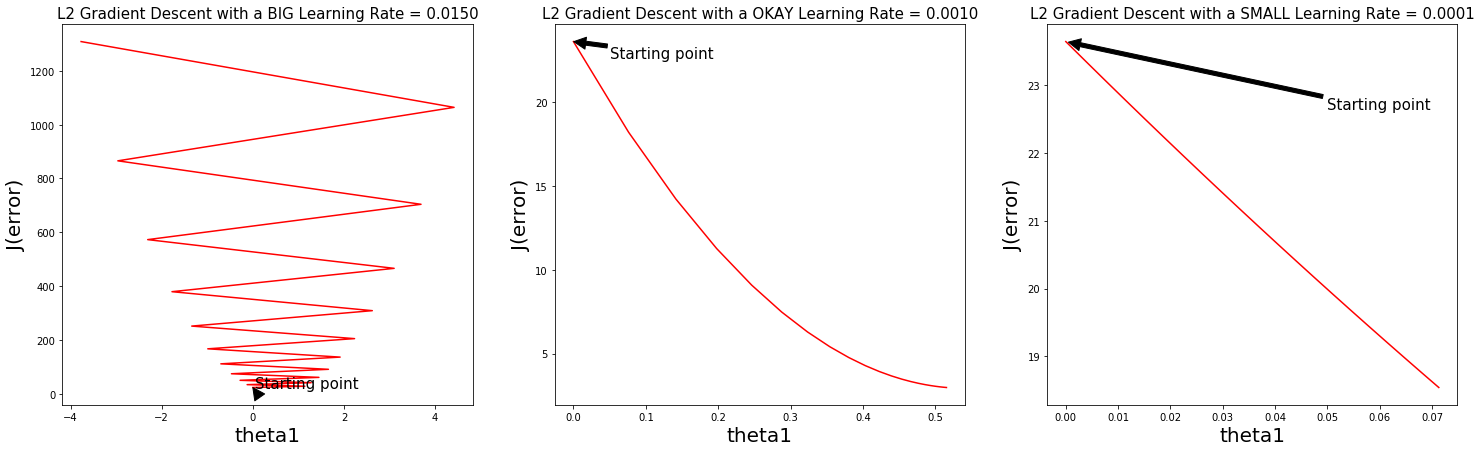

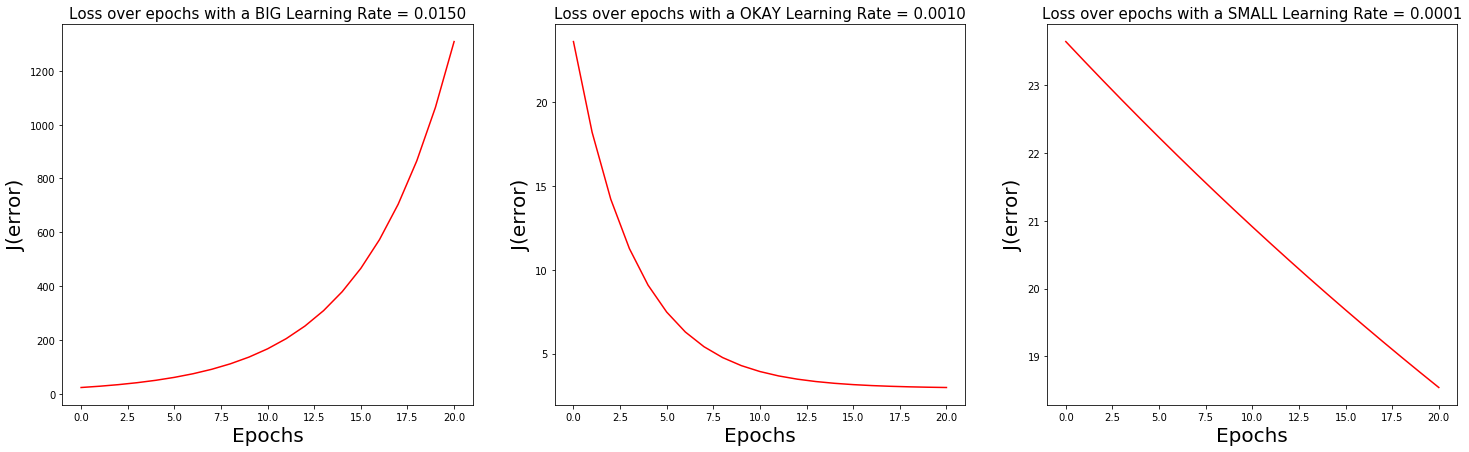

In [25]:
initialTheta = np.zeros((2,1))
epochs = 20
learningRates = {'BIG':0.015,'OKAY':0.001, 'SMALL':0.00005}
thetas = {} # contains final theta for every  learning rate

ThetaVsLossSpace =  createSubPlotsEspace(1,3) # subplots to contain all our three gradient graphic for the different learning rates
LossOverEpochsSpace = createSubPlotsEspace(1,3) # subplots to contain all our three loss over epochs graphic for the different learning rates

for i,(k,lr) in enumerate(learningRates.items()):   
    all_J,theta1_over_epochs,thetas[k] = gradientDescent(Pres_priceTrainWith1,Sel_priceTrain,initialTheta,lr,epochs)  # training a model for the actual learninng rate
    
    plotGradientDescent(theta1_over_epochs,all_J,k,lr,ThetaVsLossSpace,i) # plot gradient descent for every learning rate
    
    plotLossOverEpochs(epochs,all_J,LossOverEpochsSpace,k,lr,i)        # plot loss over epochs for every learning rate

## Our Model

In [26]:
for k,theta in thetas.items():
    print(k,' : ', theta.reshape(-1))

BIG  :  [-0.09025585 -3.7675152 ]
OKAY  :  [0.03687925 0.51528165]
SMALL  :  [0.0043578  0.07129419]


In [27]:
finalTheta = thetas['OKAY']
print("Our Model : Y = %f * x + %f" % tuple(finalTheta)[::-1])

Our Model : Y = 0.515282 * x + 0.036879


## Define the predict function

In [28]:
def predict(X, theta):
    return np.matmul(X,theta)

## Predict and Plot

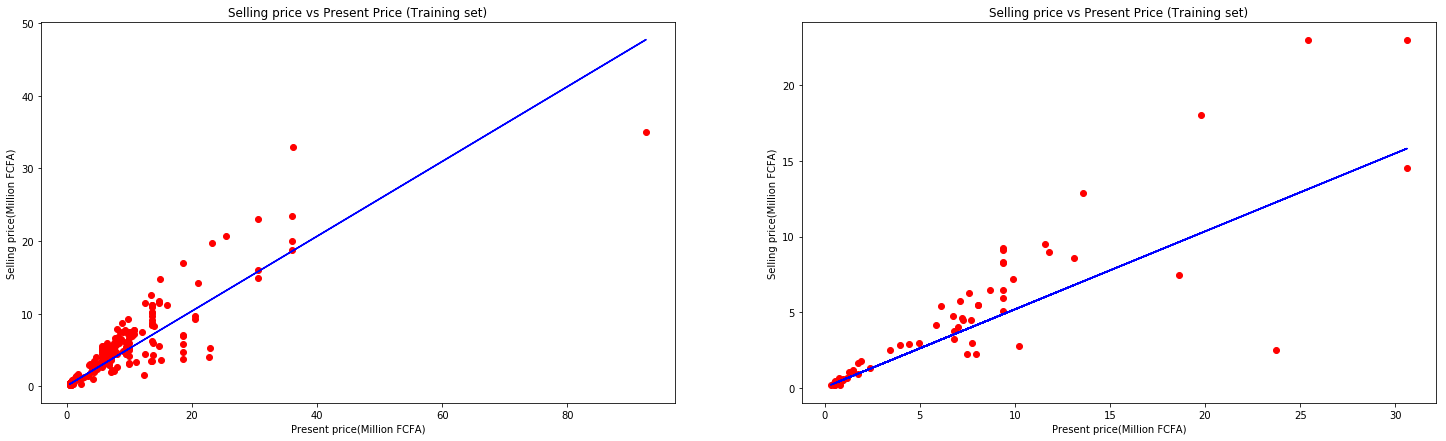

In [29]:
# prediction for training and test set
our_model_sel_price_train_pred = predict(Pres_priceTrainWith1,finalTheta)
our_model_sel_price_test_pred = predict(Pres_priceTestWith1,finalTheta)

# plot training and test prediction vs real values

selPriceVsPresentPriceSpace = createSubPlotsEspace(1,2)
scatterAnndPlot(Pres_priceTrain,Sel_priceTrain,our_model_sel_price_train_pred,
                'Selling price vs Present Price (Training set)',
                'Present price(Million FCFA)',
                'Selling price(Million FCFA)',
                selPriceVsPresentPriceSpace,0
               )
scatterAnndPlot(Pres_priceTest,Sel_priceTest,our_model_sel_price_test_pred,
                'Selling price vs Present Price (Training set)',
                'Present price(Million FCFA)',
                'Selling price(Million FCFA)',
                selPriceVsPresentPriceSpace,1
               )

## Moment Of Truth : let's compare with Scikit-Learn Model

In [30]:
# give the error for train and test data
from sklearn.metrics import mean_squared_error

def give_me_my_errors(yTrain,yTrainPred,yTest,yTestPred):
    mseTrain = mean_squared_error(yTrain, yTrainPred)
    mseTest = mean_squared_error(yTest, yTestPred)
    return mseTrain, mseTest

## Batch prediction

In [31]:
Sel_pricePredictionTrain = selPriceModel.predict(Pres_priceTrain)
Sel_pricePredictionTest = selPriceModel.predict(Pres_priceTest)

In [35]:
# compute scikit-learn model errors
mseTrain,mseTest = give_me_my_errors(Sel_priceTrain, Sel_pricePredictionTrain,Sel_priceTest, Sel_pricePredictionTest)

# compute our model errors
trainingError = L2(Pres_priceTrainWith1,Sel_priceTrain,finalTheta)
testError = L2(Pres_priceTestWith1,Sel_priceTest,finalTheta)

display(Markdown("### **~~ScikitLearn~~** : Error on Training data : **%f**; Error on Test data : **%f** 😪" % (mseTrain,mseTest)))
display(Markdown("### **Our Model**       : Error on Training data : **%f**; Error on Test data : **%f**  😎" % (trainingError,testError)))

### **~~ScikitLearn~~** : Error on Training data : **5.540181**; Error on Test data : **7.207943** 😪

### **Our Model**       : Error on Training data : **2.971370**; Error on Test data : **3.942516**  😎

## Yeah, we did it!
## Back to the old problem (Speed vs Temperature)

In [41]:
# Get predictions
speedPredTrain = speedModel.predict(tempTrain)
speedPredTest = speedModel.predict(tempTest)
# Get erros
mseTrain,mseTest = give_me_my_errors(speedTrain, speedPredTrain,speedTest, speedPredTest)
display(Markdown("# Error on Training data : **%f** <br/><br/> Error on Test data     : **%f**" % (mseTrain,mseTest)))

# Error on Training data : **198.549342** <br/><br/> Error on Test data     : **143.551347**

## Always explore your data first

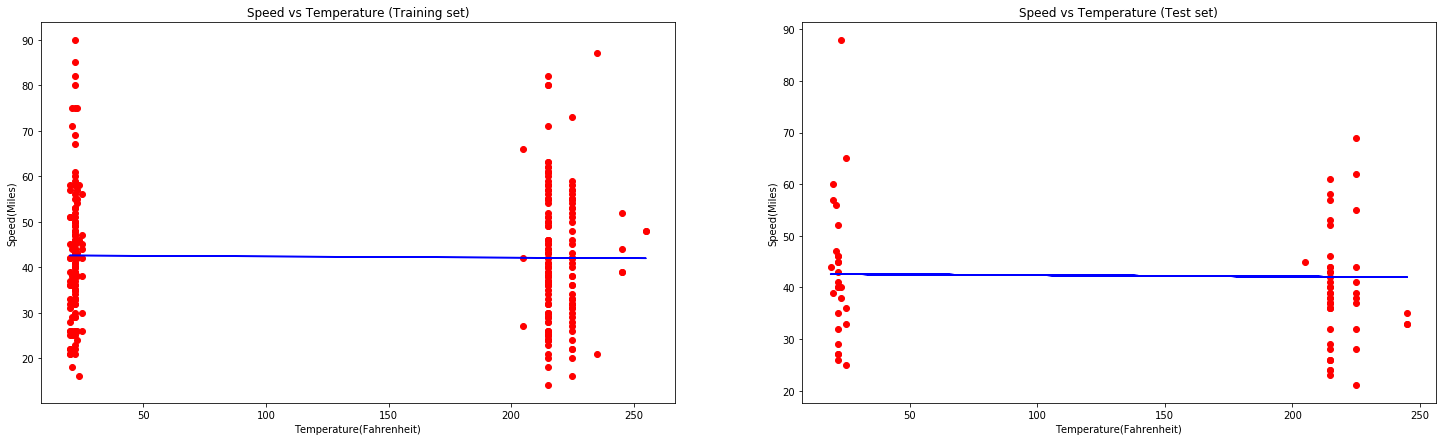

In [42]:
speedVsTemPlotSpace = createSubPlotsEspace(1,2)
scatterAnndPlot(tempTrain,speedTrain,speedPredTrain,
                'Speed vs Temperature (Training set)',
                'Temperature(Fahrenheit)','Speed(Miles)',
                   speedVsTemPlotSpace,0)
scatterAnndPlot(tempTest,speedTest,speedPredTest,
                'Speed vs Temperature (Test set)',
                'Temperature(Fahrenheit)','Speed(Miles)',
                   speedVsTemPlotSpace,1)

## A line can't fit this data at all - that was the billion FCFA question.
## Linear regression 🗣 : I can't go further
- only straight line(linear equation) => **Polynomial regression**
- only continuous variable => **Logistic regression**

## No rest for brave 
- Normal equation
- Bias and variance
- Overfitting and underfitting
- Regularization

## Resources

[Gradient Descent Derivation](http://mccormickml.com/2014/03/04/gradient-descent-derivation/) <br/>
[Coursera Machine Learning By Andre NG](https://www.coursera.org/learn/machine-learning)<br/>
[Kaggle](https://www.kaggle.com) <br/>
[scikit-learn](http://scikit-learn.org/stable/)<br/>
[NumPy](http://www.numpy.org/) <br/>
[Pandas](https://pandas.pydata.org/pandas-docs/stable/) 